In [2]:
!pip install pandas seaborn

error: externally-managed-environment

× This environment is externally managed
╰─> To install Python packages system-wide, try apt install
    python3-xyz, where xyz is the package you are trying to
    install.
    
    If you wish to install a non-Debian-packaged Python package,
    create a virtual environment using python3 -m venv path/to/venv.
    Then use path/to/venv/bin/python and path/to/venv/bin/pip. Make
    sure you have python3-full installed.
    
    If you wish to install a non-Debian packaged Python application,
    it may be easiest to use pipx install xyz, which will manage a
    virtual environment for you. Make sure you have pipx installed.
    
    See /usr/share/doc/python3.12/README.venv for more information.

note: If you believe this is a mistake, please contact your Python installation or OS distribution provider. You can override this, at the risk of breaking your Python installation or OS, by passing --break-system-packages.
hint: See PEP 668 for the detai

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_seasonal_demand(df_raw):
    """
    Vẽ biểu đồ đường để phân tích tính chu kỳ của Demand dựa trên dữ liệu gốc.
    
    Args:
        df_raw (pd.DataFrame): DataFrame sau khi load (chưa xử lý outliers).
    """
    df = df_raw.copy()
    
    # Tính tổng Demand trung bình theo tháng trên tất cả các PWSID
    df['Month'] = df['Date'].dt.month
    
    # 1. Tính tổng Demand theo ngày (tổng hợp qua tất cả PWSID)
    df_daily_total = df.groupby('Date')['Demand'].sum().reset_index()
    
    # 2. Tính Demand trung bình theo tháng (trung bình của tất cả PWSID trong 1 tháng)
    df_monthly_avg = df.groupby('Month')['Demand'].mean().reset_index()
    
    # --- Vẽ biểu đồ ---
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 10))
    fig.suptitle('PHÂN TÍCH TÍNH CHU KỲ (SEASONALITY) CỦA DEMAND WATER', fontsize=16)

    # Biểu đồ 1: Tổng Demand theo thời gian
    sns.lineplot(data=df_daily_total, x='Date', y='Demand', ax=axes[0], color='skyblue')
    axes[0].set_title('1. Tổng Demand theo Thời gian (Across All PWSIDs)', fontsize=14)
    axes[0].set_ylabel('Tổng Demand')
    axes[0].set_xlabel('Thời gian')
    axes[0].grid(True, linestyle='--', alpha=0.6)

    # Biểu đồ 2: Demand trung bình theo tháng (Chu kỳ năm) 


    sns.lineplot(data=df_monthly_avg, x='Month', y='Demand', ax=axes[1], color='salmon', marker='o')
    axes[1].set_title('2. Demand Trung bình Theo Tháng (Chu kỳ năm)', fontsize=14)
    axes[1].set_xticks(range(1, 13))
    axes[1].set_ylabel('Demand Trung bình')
    axes[1].set_xlabel('Tháng')
    axes[1].grid(True, linestyle='--', alpha=0.6)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

ModuleNotFoundError: No module named 'pandas'

In [19]:
import pandas as pd

date_cols = df_cards.columns[2:]
df_long = pd.melt(df_cards, 
    id_vars=['PWSID', 'Variable'],
    value_vars=date_cols,         
    var_name='Date',               
    value_name='Value'             
)
df_long['Date'] = pd.to_datetime(df_long['Date'])
print(df_long.head())

       PWSID       Variable       Date         Value
0  CA0110005           PDSI 2013-01-01 -1.330000e+00
1  CA0110005         demand 2013-01-01  2.523000e+09
2  CA0110005  precipitation 2013-01-01  9.770000e+00
3  CA0110005         supply 2013-01-01  4.099300e+09
4  CA0110005    temperature 2013-01-01  9.900000e+00


In [20]:
df_final = df_long.pivot_table(
    index=['PWSID', 'Date'], 
    columns='Variable', 
    values='Value'
).reset_index()

df_final.columns.name = None
df_final.rename(columns={'demand': 'Demand', 'precipitation': 'Precipitation', 'supply': 'Supply', 'temperature': 'Temperature'},inplace=True)
df_final.head(5)

,PWSID,Date,PDSI,Demand,Precipitation,Supply,Temperature
0,CA0110005,2013-01-01,-1.33,2.523000e+09,9.77,4.099300e+09,9.9
1,CA0110005,2013-02-01,-2.02,2.442000e+09,14.80,4.016400e+09,11.4
2,CA0110005,2013-03-01,-2.76,3.012000e+09,15.05,4.927500e+09,13.3
3,CA0110005,2013-04-01,-3.23,3.356000e+09,30.95,5.417500e+09,15.1
4,CA0110005,2013-05-01,-3.72,4.021000e+09,1.28,6.716500e+09,16.0


In [21]:
df_merged = df_final.copy()

In [22]:
df_merged['Date'] = pd.to_datetime(df_merged['Date'])
df_merged['Year'] = df_merged['Date'].dt.year
df_merged['Month'] = df_merged['Date'].dt.month

In [23]:
df_merged

,PWSID,Date,PDSI,Demand,Precipitation,Supply,Temperature,Year,Month
0,CA0110005,2013-01-01,-1.33,2.523000e+09,9.77,4.099300e+09,9.9,2013,1
1,CA0110005,2013-02-01,-2.02,2.442000e+09,14.80,4.016400e+09,11.4,2013,2
2,CA0110005,2013-03-01,-2.76,3.012000e+09,15.05,4.927500e+09,13.3,2013,3
3,CA0110005,2013-04-01,-3.23,3.356000e+09,30.95,5.417500e+09,15.1,2013,4
4,CA0110005,2013-05-01,-3.72,4.021000e+09,1.28,6.716500e+09,16.0,2013,5
...,...,...,...,...,...,...,...,...,...
43627,CA5810002,2021-08-01,-5.88,1.057800e+08,0.00,1.089088e+11,25.5,2021,8
43628,CA5810002,2021-09-01,-5.40,9.047000e+07,2.61,9.611800e+10,23.6,2021,9
43629,CA5810002,2021-10-01,-2.74,8.341000e+07,190.32,8.085880e+10,16.6,2021,10
43630,CA5810002,2021-11-01,-3.34,4.782000e+07,23.61,5.138760e+10,12.5,2021,11


In [24]:
df_merged.describe()

,Date,PDSI,Demand,Precipitation,Supply,Temperature,Year,Month
count,43632,43632.000000,4.363200e+04,43632.000000,4.363200e+04,43632.000000,43632.000000,43632.000000
mean,2017-06-16 08:26:39.999999744,-2.927292,1.270518e+11,38.044236,5.022718e+11,16.680455,2017.000000,6.500000
min,2013-01-01 00:00:00,-8.700000,-2.222304e+06,0.000000,3.700000e+00,-4.900000,2013.000000,1.000000
25%,2015-03-24 06:00:00,-5.020000,5.316288e+06,0.070000,1.178822e+07,12.600000,2015.000000,3.750000
50%,2017-06-16 00:00:00,-2.970000,3.427256e+07,7.690000,6.386680e+07,16.500000,2017.000000,6.500000
75%,2019-09-08 12:00:00,-1.170000,1.316527e+08,41.122500,2.282187e+08,21.100000,2019.000000,9.250000
max,2021-12-01 00:00:00,5.830000,5.865319e+14,1042.160000,7.421259e+14,36.000000,2021.000000,12.000000
std,NaN,2.710005,5.795575e+12,73.040889,1.413220e+13,5.825334,2.582018,3.452092


In [25]:
missing_values = df_merged.isnull().sum()
missing_percentage = (missing_values / len(df_merged)) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
})
print(missing_df[missing_df['Missing Values'] > 0])
print("Handling Missing Values:")
negative_demand = df_merged[df_merged['Demand'] <= 0].shape[0]
negative_supply = df_merged[df_merged['Supply'] <= 0].shape[0]
if negative_demand > 0:
    df_merged['Demand'] = df_merged['Demand'].clip(lower=1)
    print("✓ Clipped Demand values to minimum of 1")

if negative_supply > 0:
    df_merged['Supply'] = df_merged['Supply'].clip(lower=1)
    print("✓ Clipped Supply values to minimum of 1")

numerical_cols_to_impute = ['PDSI', 'Demand', 'Precipitation', 'Supply', 'Temperature']
for col in numerical_cols_to_impute:
    if df_merged[col].isnull().sum() > 0:
        print(f"{col} has {df_merged[col].isnull().sum()} missing values")
        df_merged[col] = df_merged[col].fillna(df_merged[col].median())
        print(f"Missing {col} values filled with column median")



def cap_outliers_iqr(df, column, lower_percentile=0.01, upper_percentile=0.99):
    """
    Cap outliers using percentile-based method instead of IQR
    This is more robust for skewed data
    """
    Q_low = df[column].quantile(lower_percentile)
    Q_high = df[column].quantile(upper_percentile)
    outliers_low = df[df[column] < Q_low].shape[0]
    outliers_high = df[df[column] > Q_high].shape[0]
    total_outliers = outliers_low + outliers_high
    df_capped = df.copy()
    df_capped[column] = df_capped[column].clip(lower=Q_low, upper=Q_high)
    
    return df_capped, total_outliers, Q_low, Q_high

features_to_cap = ['Demand', 'Supply', 'Precipitation', 'Temperature', 'PDSI']


for feature in features_to_cap:
    df_merged, outliers_count, Q_low, Q_high = cap_outliers_iqr(
        df_merged, feature, lower_percentile=0.01, upper_percentile=0.99
    )
    outliers_percentage = (outliers_count / len(df_merged)) * 100
    print(f"{feature}:")
    print(f"  - Outliers capped: {outliers_count:,} ({outliers_percentage:.2f}%)")
    print(f"  - Lower bound (1st percentile): {Q_low:.4f}")
    print(f"  - Upper bound (99th percentile): {Q_high:.4f}")
    print()


Empty DataFrame
Columns: [Missing Values, Percentage (%)]
Index: []
Handling Missing Values:
✓ Clipped Demand values to minimum of 1
Demand:
  - Outliers capped: 874 (2.00%)
  - Lower bound (1st percentile): 680.6500
  - Upper bound (99th percentile): 3612412929.4000

Supply:
  - Outliers capped: 874 (2.00%)
  - Lower bound (1st percentile): 211385.4100
  - Upper bound (99th percentile): 79509742000.0101

Precipitation:
  - Outliers capped: 437 (1.00%)
  - Lower bound (1st percentile): 0.0000
  - Upper bound (99th percentile): 366.2654

Temperature:
  - Outliers capped: 864 (1.98%)
  - Lower bound (1st percentile): 3.1000
  - Upper bound (99th percentile): 29.4000

PDSI:
  - Outliers capped: 789 (1.81%)
  - Lower bound (1st percentile): -8.0800
  - Upper bound (99th percentile): 3.3100




3. Filling Missing Months (Time Series Completion):
----------------------------------------
Before time series completion: 43632 rows
After time series completion: 43632 rows
Added 0 rows to fill gaps

4. Verifying Temporal Structure:
----------------------------------------
Missing values after time series completion:

Monthly frequency check:
  Average days between records: 1.00 days
  Standard deviation: 0.03 days
  Consistent ~30-day intervals: ✓ Yes

5. Creating Time Series Features:
----------------------------------------
Time series completeness check:

PWSID CA0110005:
  - Start: 2013-01-01
  - End: 2021-12-01
  - Total months: 108
  - Expected months: 108
  - Complete: ✓

PWSID CA0110006:
  - Start: 2013-01-01
  - End: 2021-12-01
  - Total months: 108
  - Expected months: 108
  - Complete: ✓

PWSID CA0110008:
  - Start: 2013-01-01
  - End: 2021-12-01
  - Total months: 108
  - Expected months: 108
  - Complete: ✓

6. Time-Based Summary Statistics:
---------------------------

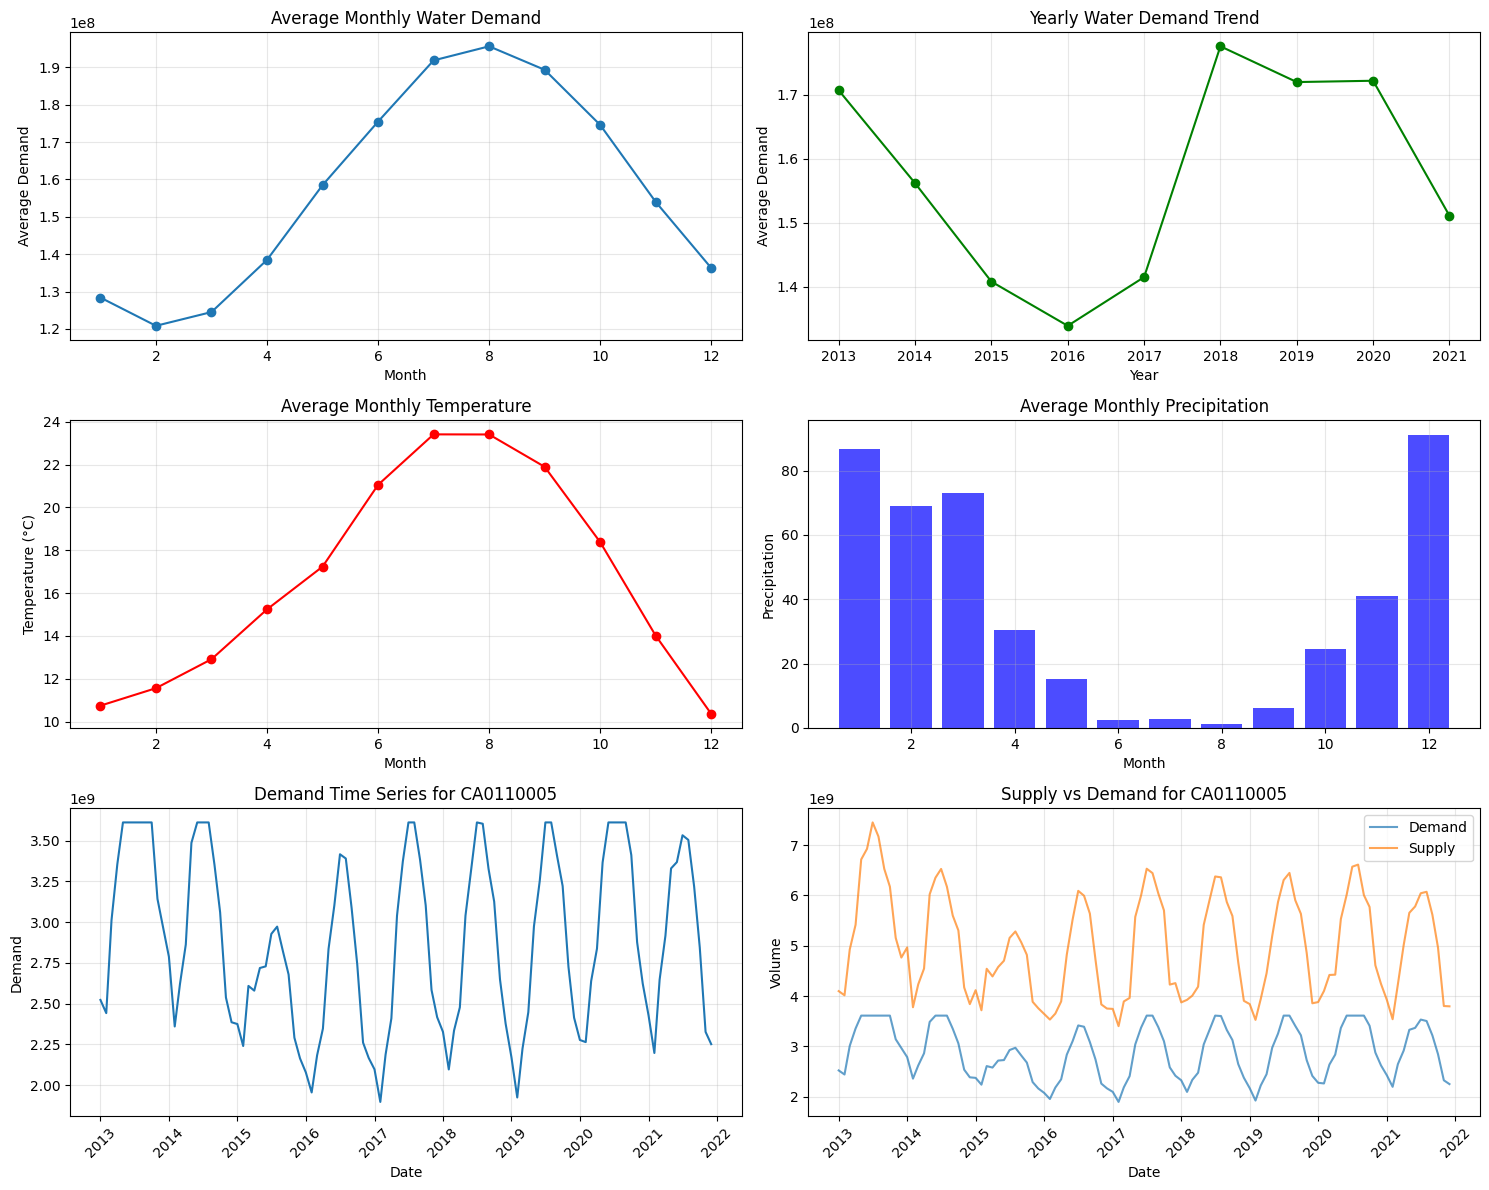


TEMPORAL AGGREGATION COMPLETE
Final dataset shape: (43632, 14)
Time period: 2013-01-01 to 2021-12-01
Frequency: Monthly
Complete time series for 404 PWSIDs


In [26]:
df_merged['YearMonth'] = df_merged['Date'].dt.to_period('M')


monthly_counts = df_merged.groupby(['PWSID', 'YearMonth']).size().reset_index(name='Count')
duplicate_months = monthly_counts[monthly_counts['Count'] > 1]


if len(duplicate_months) > 0:
    print("Found potential duplicate months. Investigating...")
    print("Sample of duplicates:")
    print(duplicate_months.head())
    
    # Check specific examples
    sample_pwsid = duplicate_months.iloc[0]['PWSID']
    sample_month = duplicate_months.iloc[0]['YearMonth']
    duplicates_sample = df_merged[
        (df_merged['PWSID'] == sample_pwsid) & 
        (df_merged['YearMonth'] == sample_month)
    ]
    print(f"\nSample duplicate entries for {sample_pwsid} - {sample_month}:")
    print(duplicates_sample[['Date', 'Demand', 'Supply']])
    
    print("\nResolving duplicates by aggregating monthly values...")

    aggregation_rules = {
        'PDSI': 'mean',
        'Demand': 'mean',
        'Precipitation': 'sum',  
        'Supply': 'mean',
        'Temperature': 'mean',
        'Year': 'first',
        'Month': 'first'
    }

    df_monthly = df_merged.groupby(['PWSID', 'YearMonth']).agg(aggregation_rules).reset_index()
    df_monthly['Date'] = df_monthly['YearMonth'].dt.to_timestamp()
    df_monthly = df_monthly.drop('YearMonth', axis=1)
    
    print(f"After deduplication: {df_monthly.shape[0]} rows")
    
else:
    
    df_monthly = df_merged.copy()
full_date_range = pd.date_range(
    start=df_monthly['Date'].min(),
    end=df_monthly['Date'].max(),
    freq='MS' 
)


pwsid_list = df_monthly['PWSID'].unique()
incomplete_pwsids = []
complete_pwsids = []

for pwsid in pwsid_list[:10]:  
    pwsid_data = df_monthly[df_monthly['PWSID'] == pwsid]
    pwsid_dates = pwsid_data['Date']
    missing_dates = set(full_date_range) - set(pwsid_dates)
    
    if len(missing_dates) > 0:
        incomplete_pwsids.append((pwsid, len(missing_dates)))
    else:
        complete_pwsids.append(pwsid)

if incomplete_pwsids:
    print("\nExamples of incomplete PWSIDs (PWSID, missing months):")
    for pwsid, missing_count in incomplete_pwsids[:5]:
        print(f"  {pwsid}: {missing_count} months missing")

print("\n3. Filling Missing Months (Time Series Completion):")
print("-" * 40)

complete_time_series = []

for pwsid in df_monthly['PWSID'].unique():
    pwsid_data = df_monthly[df_monthly['PWSID'] == pwsid].copy()
    
    # Create complete date range for this PWSID
    pwsid_dates = pd.date_range(
        start=pwsid_data['Date'].min(),
        end=pwsid_data['Date'].max(),
        freq='MS'
    )

    pwsid_data = pwsid_data.set_index('Date')
    pwsid_data = pwsid_data.reindex(pwsid_dates)
    
    pwsid_data['PWSID'] = pwsid
    pwsid_data['Date'] = pwsid_data.index
    

    for col in ['Climate Zone', 'Population_21']:
        if col in pwsid_data.columns:
            pwsid_data[col] = pwsid_data[col].ffill().bfill()
    
    for col in ['PDSI', 'Demand', 'Precipitation', 'Supply', 'Temperature']:
        if col in pwsid_data.columns:
            # Use linear interpolation for missing values
            pwsid_data[col] = pwsid_data[col].interpolate(method='linear', limit_direction='both')

    pwsid_data['Year'] = pwsid_data.index.year
    pwsid_data['Month'] = pwsid_data.index.month
    
    complete_time_series.append(pwsid_data.reset_index(drop=True))

df_complete = pd.concat(complete_time_series, ignore_index=True)

print(f"Before time series completion: {df_monthly.shape[0]} rows")
print(f"After time series completion: {df_complete.shape[0]} rows")
print(f"Added {df_complete.shape[0] - df_monthly.shape[0]} rows to fill gaps")

# 2.4 Verify Temporal Structure
print("\n4. Verifying Temporal Structure:")
print("-" * 40)

# Check for any remaining missing values
missing_after = df_complete.isnull().sum()
print("Missing values after time series completion:")
for col, count in missing_after.items():
    if count > 0:
        print(f"  {col}: {count} missing values ({count/len(df_complete)*100:.2f}%)")

# Verify monthly frequency
df_complete['Date'] = pd.to_datetime(df_complete['Date'])
df_complete['MonthDiff'] = df_complete.groupby('PWSID')['Date'].diff().dt.days / 30.44  # Approximate months

print(f"\nMonthly frequency check:")
print(f"  Average days between records: {df_complete['MonthDiff'].mean():.2f} days")
print(f"  Standard deviation: {df_complete['MonthDiff'].std():.2f} days")

# Check for consistent monthly intervals
consistent_intervals = df_complete['MonthDiff'].dropna().between(0.9, 1.1).all()
print(f"  Consistent ~30-day intervals: {'✓ Yes' if consistent_intervals else '✗ No'}")

# 2.5 Create Time Series Features
print("\n5. Creating Time Series Features:")
print("-" * 40)

# Sort by PWSID and Date
df_complete = df_complete.sort_values(['PWSID', 'Date']).reset_index(drop=True)

# Create time-based features
df_complete['TimeIndex'] = df_complete.groupby('PWSID').cumcount() + 1
df_complete['DaysSinceStart'] = (df_complete['Date'] - df_complete.groupby('PWSID')['Date'].transform('min')).dt.days
df_complete['Quarter'] = df_complete['Date'].dt.quarter
df_complete['YearMonth'] = df_complete['Date'].dt.to_period('M')

# Verify we have complete consecutive months
print("Time series completeness check:")
for i, pwsid in enumerate(df_complete['PWSID'].unique()[:3]):  # Check first 3 PWSIDs
    pwsid_data = df_complete[df_complete['PWSID'] == pwsid]
    expected_months = pd.date_range(
        start=pwsid_data['Date'].min(),
        end=pwsid_data['Date'].max(),
        freq='MS'
    )
    
    print(f"\nPWSID {pwsid}:")
    print(f"  - Start: {pwsid_data['Date'].min().strftime('%Y-%m-%d')}")
    print(f"  - End: {pwsid_data['Date'].max().strftime('%Y-%m-%d')}")
    print(f"  - Total months: {len(pwsid_data)}")
    print(f"  - Expected months: {len(expected_months)}")
    print(f"  - Complete: {'✓' if len(pwsid_data) == len(expected_months) else '✗'}")

# 2.6 Summary Statistics by Time Period
print("\n6. Time-Based Summary Statistics:")
print("-" * 40)

# Yearly statistics
yearly_stats = df_complete.groupby('Year').agg({
    'Demand': ['mean', 'sum', 'count'],
    'Supply': ['mean', 'sum'],
    'Temperature': 'mean',
    'Precipitation': 'sum'
}).round(2)

print("\nYearly Statistics:")
print(yearly_stats)

# Monthly statistics
monthly_stats = df_complete.groupby('Month').agg({
    'Demand': 'mean',
    'Temperature': 'mean',
    'Precipitation': 'mean'
}).round(2)

print("\nMonthly Average Statistics:")
print(monthly_stats)

# 2.7 Visualization of Temporal Patterns
print("\n7. Visualizing Temporal Patterns:")
print("-" * 40)

fig, axes = plt.subplots(3, 2, figsize=(15, 12))

# 1. Monthly demand pattern
monthly_avg_demand = df_complete.groupby('Month')['Demand'].mean()
axes[0, 0].plot(monthly_avg_demand.index, monthly_avg_demand.values, marker='o')
axes[0, 0].set_title('Average Monthly Water Demand')
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Average Demand')
axes[0, 0].grid(True, alpha=0.3)

# 2. Yearly trend
yearly_avg_demand = df_complete.groupby('Year')['Demand'].mean()
axes[0, 1].plot(yearly_avg_demand.index, yearly_avg_demand.values, marker='o', color='green')
axes[0, 1].set_title('Yearly Water Demand Trend')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('Average Demand')
axes[0, 1].grid(True, alpha=0.3)

# 3. Temperature pattern
monthly_avg_temp = df_complete.groupby('Month')['Temperature'].mean()
axes[1, 0].plot(monthly_avg_temp.index, monthly_avg_temp.values, marker='o', color='red')
axes[1, 0].set_title('Average Monthly Temperature')
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('Temperature (°C)')
axes[1, 0].grid(True, alpha=0.3)

# 4. Precipitation pattern
monthly_avg_precip = df_complete.groupby('Month')['Precipitation'].mean()
axes[1, 1].bar(monthly_avg_precip.index, monthly_avg_precip.values, color='blue', alpha=0.7)
axes[1, 1].set_title('Average Monthly Precipitation')
axes[1, 1].set_xlabel('Month')
axes[1, 1].set_ylabel('Precipitation')
axes[1, 1].grid(True, alpha=0.3)

# 5. Time series sample for one PWSID
sample_pwsid = df_complete['PWSID'].iloc[0]
sample_data = df_complete[df_complete['PWSID'] == sample_pwsid]
axes[2, 0].plot(sample_data['Date'], sample_data['Demand'])
axes[2, 0].set_title(f'Demand Time Series for {sample_pwsid}')
axes[2, 0].set_xlabel('Date')
axes[2, 0].set_ylabel('Demand')
axes[2, 0].tick_params(axis='x', rotation=45)
axes[2, 0].grid(True, alpha=0.3)

# 6. Supply vs Demand over time for sample PWSID
axes[2, 1].plot(sample_data['Date'], sample_data['Demand'], label='Demand', alpha=0.7)
axes[2, 1].plot(sample_data['Date'], sample_data['Supply'], label='Supply', alpha=0.7)
axes[2, 1].set_title(f'Supply vs Demand for {sample_pwsid}')
axes[2, 1].set_xlabel('Date')
axes[2, 1].set_ylabel('Volume')
axes[2, 1].legend()
axes[2, 1].tick_params(axis='x', rotation=45)
axes[2, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Update the main dataframe
df_merged = df_complete.copy()

print("\n" + "=" * 60)
print("TEMPORAL AGGREGATION COMPLETE")
print("=" * 60)
print(f"Final dataset shape: {df_merged.shape}")
print(f"Time period: {df_merged['Date'].min().strftime('%Y-%m-%d')} to {df_merged['Date'].max().strftime('%Y-%m-%d')}")
print(f"Frequency: Monthly")
print(f"Complete time series for {df_merged['PWSID'].nunique()} PWSIDs")

In [27]:
df_monthly

,PWSID,Date,PDSI,Demand,Precipitation,Supply,Temperature,Year,Month,YearMonth
0,CA0110005,2013-01-01,-1.33,2.523000e+09,9.77,4.099300e+09,9.9,2013,1,2013-01
1,CA0110005,2013-02-01,-2.02,2.442000e+09,14.80,4.016400e+09,11.4,2013,2,2013-02
2,CA0110005,2013-03-01,-2.76,3.012000e+09,15.05,4.927500e+09,13.3,2013,3,2013-03
3,CA0110005,2013-04-01,-3.23,3.356000e+09,30.95,5.417500e+09,15.1,2013,4,2013-04
4,CA0110005,2013-05-01,-3.72,3.612413e+09,1.28,6.716500e+09,16.0,2013,5,2013-05
...,...,...,...,...,...,...,...,...,...,...
43627,CA5810002,2021-08-01,-5.88,1.057800e+08,0.00,7.950974e+10,25.5,2021,8,2021-08
43628,CA5810002,2021-09-01,-5.40,9.047000e+07,2.61,7.950974e+10,23.6,2021,9,2021-09
43629,CA5810002,2021-10-01,-2.74,8.341000e+07,190.32,7.950974e+10,16.6,2021,10,2021-10
43630,CA5810002,2021-11-01,-3.34,4.782000e+07,23.61,5.138760e+10,12.5,2021,11,2021-11


/tmp/ipykernel_4685/2894550727.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=demand_corr_other.index, y=demand_corr_other.values, palette='viridis')


Correlation values:
Temperature      0.098546
Month            0.030758
Year             0.007430
PDSI            -0.034907
Precipitation   -0.059084
Name: Demand, dtype: float64

Bar chart of correlation saved as 'demand_correlation_bar_chart.png'


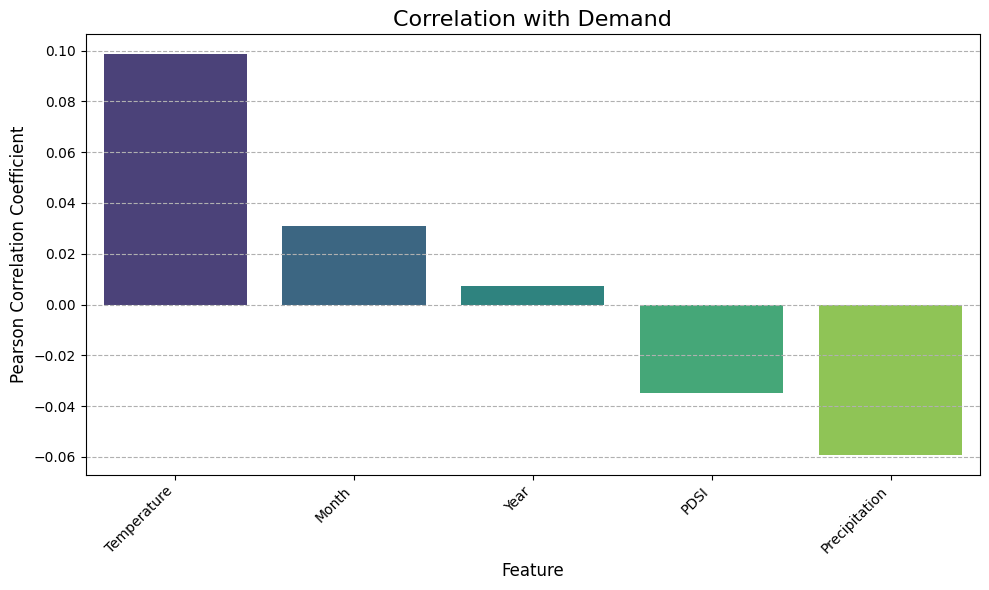

In [28]:
features = ['PDSI', 'Precipitation', 'Demand', 'Temperature', 'Year', 'Month']

df = df_monthly[features].copy()
df = df.dropna()
correlation_matrix = df.corr()
demand_corr = correlation_matrix['Demand'].sort_values(ascending=False)
demand_corr_other = demand_corr.drop('Demand')
plt.figure(figsize=(10, 6))
sns.barplot(x=demand_corr_other.index, y=demand_corr_other.values, palette='viridis')
plt.title('Correlation with Demand', fontsize=16)
plt.ylabel('Pearson Correlation Coefficient', fontsize=12)
plt.xlabel('Feature', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.savefig('demand_correlation_bar_chart.png')

print("Correlation values:")
print(demand_corr_other)
print("\nBar chart of correlation saved as 'demand_correlation_bar_chart.png'")


In [29]:
df_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43632 entries, 0 to 43631
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   PWSID          43632 non-null  object        
 1   Date           43632 non-null  datetime64[ns]
 2   PDSI           43632 non-null  float64       
 3   Demand         43632 non-null  float64       
 4   Precipitation  43632 non-null  float64       
 5   Supply         43632 non-null  float64       
 6   Temperature    43632 non-null  float64       
 7   Year           43632 non-null  int32         
 8   Month          43632 non-null  int32         
 9   YearMonth      43632 non-null  period[M]     
dtypes: datetime64[ns](1), float64(5), int32(2), object(1), period[M](1)
memory usage: 3.0+ MB


In [31]:
!pip install xgboost lightgbm catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.9/115.9 MB 48.3 MB/s  0:00:02m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 44.8 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 49.4 MB/s  0:00:026m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.8/296.8 MB 41.6 MB/s  0:00:06m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [catboost]4/5 [catboost]


--- Running Gradient Boosting for PWSID: CA0110005 ---
--- Applying Temperature Regularization (Noise Injection) ---
Added Gaussian noise (sigma=0.39) to X_train['Temperature']
Train Shape: (84, 11), Test Shape: (12, 11)
LinearRegression | 4.94       | 0.8688     | 175,034,681
Ridge           | 4.96       | 0.8708     | 173,741,212
Lasso           | 4.94       | 0.8688     | 175,034,678
ElasticNet      | 4.95       | 0.8695     | 174,564,855
DecisionTree    | 7.06       | 0.7020     | 263,806,790
RandomForest    | 6.92       | 0.7664     | 233,590,669
ExtraTrees      | 5.70       | 0.8566     | 183,009,903
GradientBoosting | 6.61       | 0.7707     | 231,407,768
XGBoost         | 5.61       | 0.8616     | 179,773,014
LightGBM        | 5.56       | 0.8192     | 205,471,871
CatBoost        | 5.13       | 0.8777     | 168,995,398


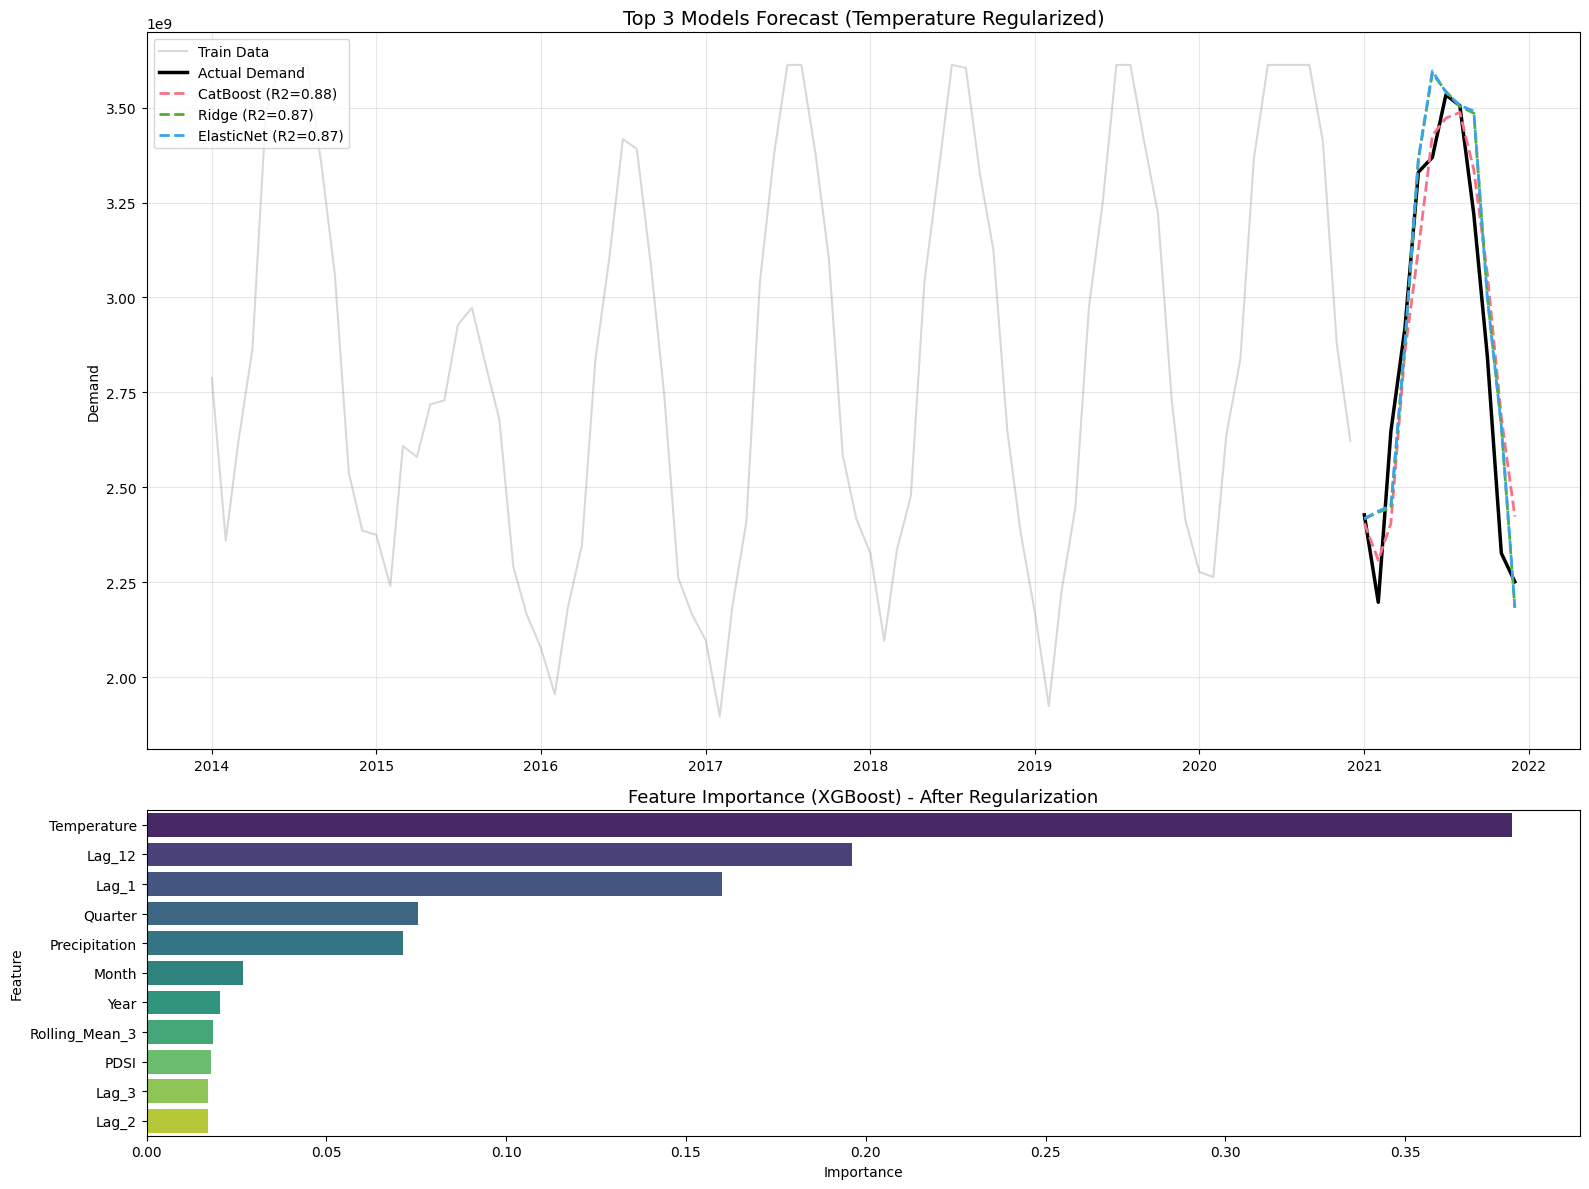

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor

import warnings
warnings.filterwarnings('ignore')
target_pwsid = df_monthly['PWSID'].unique()[0]
print(f"--- Running Gradient Boosting for PWSID: {target_pwsid} ---")

data = df_monthly[df_monthly['PWSID'] == target_pwsid].copy()
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data = data.sort_index()

target_col = 'Demand'

# Tạo Time Features
data['Month'] = data.index.month
data['Year'] = data.index.year
data['Quarter'] = data.index.quarter

# Tạo Lags & Rolling
lags = [1, 2, 3, 12]
for lag in lags:
    data[f'Lag_{lag}'] = data[target_col].shift(lag)

data['Rolling_Mean_3'] = data[target_col].shift(1).rolling(window=3).mean()

weather_cols = ['Temperature', 'Precipitation', 'PDSI']
final_features = ['Month', 'Year', 'Quarter', 'Rolling_Mean_3'] + [f'Lag_{l}' for l in lags] + weather_cols
data = data.dropna()

# Chia Train/Test
train = data[data.index.year < 2021]
test = data[data.index.year == 2021]

X_train = train[final_features].copy() # Copy để tránh warning khi sửa đổi
y_train = train[target_col]
X_test = test[final_features].copy()
y_test = test[target_col]

print("--- Applying Temperature Regularization (Noise Injection) ---")
noise_level = 0.15
sigma = noise_level * X_train['Temperature'].std()
noise = np.random.normal(0, sigma, X_train.shape[0])
X_train['Temperature'] = X_train['Temperature'] + noise

print(f"Added Gaussian noise (sigma={sigma:.2f}) to X_train['Temperature']")

print(f"Train Shape: {X_train.shape}, Test Shape: {X_test.shape}")
models = {
    # Linear Models
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=10.0), 
    "Lasso": Lasso(alpha=1.0),
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5),

    "DecisionTree": DecisionTreeRegressor(max_depth=4, random_state=42),
    "RandomForest": RandomForestRegressor(n_estimators=500, max_depth=4, n_jobs=-1, random_state=42),
    "ExtraTrees": ExtraTreesRegressor(n_estimators=500, max_depth=4,n_jobs=-1, random_state=42),

    "GradientBoosting": GradientBoostingRegressor(
        n_estimators=500, learning_rate=0.01, max_depth=4
    ),
    "XGBoost": XGBRegressor(
        n_estimators=1000, 
        learning_rate=0.01, 
        max_depth=4, 
        subsample=0.8,
        colsample_bytree=0.6, 
        reg_alpha=1,          
        reg_lambda=1,         
        random_state=42,
        n_jobs=-1
    ),
    "LightGBM": LGBMRegressor(
        n_estimators=1000,
        learning_rate=0.01,
        max_depth=4,
        num_leaves=15,
        colsample_bytree=0.6, 
        reg_lambda=1,
        random_state=42,
        n_jobs=-1,
        verbose=-1
    ),
    "CatBoost": CatBoostRegressor(
        iterations=1000,
        learning_rate=0.01,
        depth=4,
        l2_leaf_reg=5, 
        loss_function='RMSE',
        random_seed=42,
        verbose=0,
        allow_writing_files=False
    )
}
results = {}
predictions = {}
for name, model in models.items(): 
    model.fit(X_train, y_train) 
    pred = model.predict(X_test)  
    predictions[name] = pd.Series(pred, index=test.index)
    mape = np.mean(np.abs((y_test - pred) / y_test)) * 100 
    rmse = np.sqrt(mean_squared_error(y_test, pred)) 
    r2 = r2_score(y_test, pred) 
    results[name] = {'MAPE': mape, 'R2': r2, 'RMSE': rmse} 
    print(f"{name:<15} | {mape:<10.2f} | {r2:<10.4f} | {rmse:,.0f}")

fig, axes = plt.subplots(2, 1, figsize=(16, 12), gridspec_kw={'height_ratios': [2.2, 1]})
ax1, ax2 = axes

# Plot Forecast
ax1.plot(train.index, y_train, label='Train Data', color='gray', alpha=0.3)
ax1.plot(test.index, y_test, label='Actual Demand', color='black', linewidth=2.5)

sorted_models = sorted(results.items(), key=lambda x: x[1]['R2'], reverse=True)[:3]
top_names = [m[0] for m in sorted_models]
palette = sns.color_palette("husl", len(top_names))

for (name, stats), color in zip(sorted_models, palette):
    ax1.plot(test.index, predictions[name], 
             label=f'{name} (R2={stats["R2"]:.2f})', 
             color=color, linestyle='--', linewidth=2)

ax1.set_title("Top 3 Models Forecast (Temperature Regularized)", fontsize=14)
ax1.set_ylabel("Demand")
ax1.legend(loc='upper left', fontsize=10)
ax1.grid(alpha=0.3)
xgb_model = models["XGBoost"]
importance = xgb_model.feature_importances_
feat_imp = pd.DataFrame({'Feature': X_train.columns, 'Importance': importance}).sort_values("Importance", ascending=False)

sns.barplot(data=feat_imp, x="Importance", y="Feature", ax=ax2, palette="viridis")
ax2.set_title("Feature Importance (XGBoost) - After Regularization", fontsize=13)
plt.tight_layout()
plt.show()


In [34]:
!pip install statsmodels tensorflow keras 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 46.2 MB/s  0:00:006m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 21.5 MB/s  0:00:14m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 48.0 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 52.1 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 37.8 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 45.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 35.4 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 51.3 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 44.1 MB/s  0:00:006m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27/27 [tensorflow]7 [tensorflow]]py]a-server]


2025-12-04 02:17:08.019476: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-12-04 02:17:09.193787: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-04 02:17:11.426291: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


--- Optimizing Pipeline for PWSID: CA0110005 ---
   -> Dropped 'Day' because it is constant (no variance).
   -> Checking Correlation on valid features...
Demand           1.000000
Temperature      0.753246
Precipitation    0.634490
Month            0.299389
PDSI             0.180946
DayOfWeek        0.006242
Name: Demand, dtype: float64
   -> FINAL Selected Features for Model: ['Temperature', 'Precipitation', 'Month', 'PDSI']

[2] Tuning SARIMA Parameters...
Best AIC: 1352.32

[3] Training LSTM on Residuals...


2025-12-04 02:17:29.895851: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step

--- Final Results ---
MAPE: 6.52%
R2: 0.7955
MAE: 189788015.58%


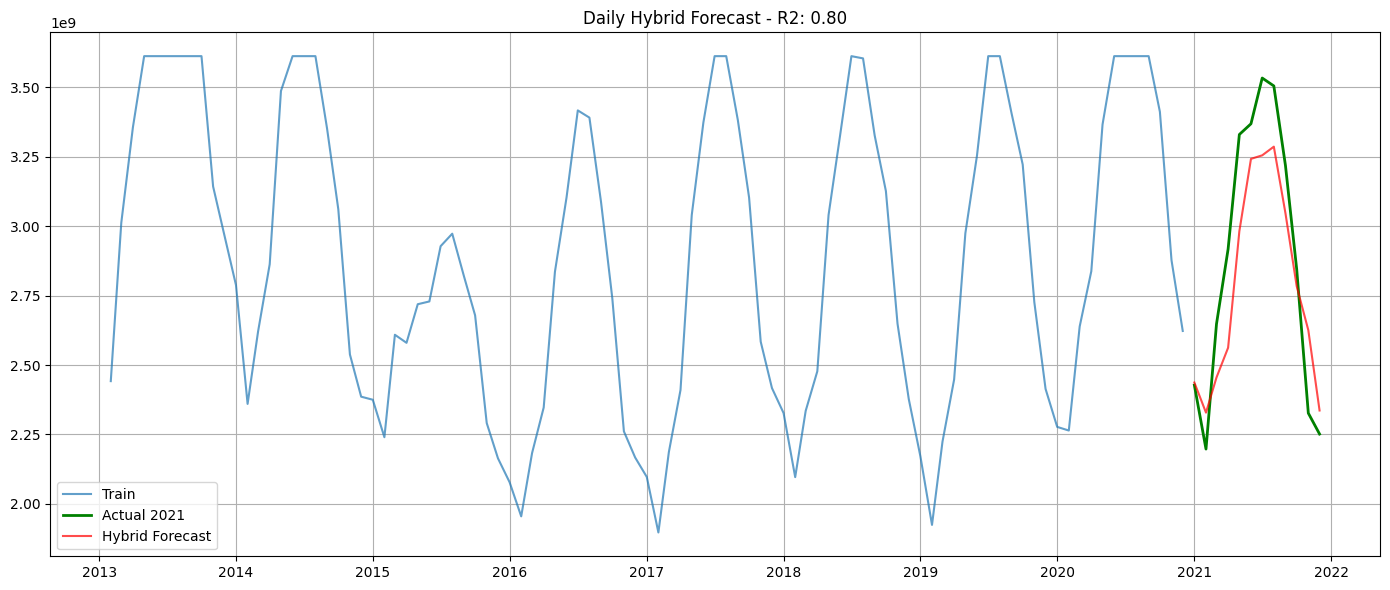

In [35]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings('ignore')
df_daily = df_merged.copy()
target_pwsid = df_daily['PWSID'].unique()[0] 
print(f"--- Optimizing Pipeline for PWSID: {target_pwsid} ---")

data = df_daily[df_daily['PWSID'] == target_pwsid].copy()
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data['DayOfWeek'] = data.index.dayofweek 
data['Day'] = data.index.day  
data['Month'] = data.index.month  
potential_features = ['Temperature', 'Precipitation', 'PDSI', 'DayOfWeek', 'Day', 'Month']
target_col = 'Demand'
data = data.dropna()

valid_features = []
for col in potential_features:
    if data[col].nunique() > 1: 
        valid_features.append(col)
    else:
        print(f"   -> Dropped '{col}' because it is constant (no variance).")

print("   -> Checking Correlation on valid features...")
corr_matrix = data[[target_col] + valid_features].corr()
target_corr = corr_matrix[target_col].abs().sort_values(ascending=False)

print(target_corr)
selected_features = target_corr[target_corr > 0.1].index.tolist()
if target_col in selected_features:
    selected_features.remove(target_col)

print(f"   -> FINAL Selected Features for Model: {selected_features}")

# Chia Train/Test
train_data = data[data.index.year < 2021]
test_data = data[data.index.year == 2021]

# --- SARIMA TUNING (Chu kỳ tuần - 7 ngày) ---
print("\n[2] Tuning SARIMA Parameters...")

exog_train = train_data[selected_features] if selected_features else None
exog_test = test_data[selected_features] if selected_features else None

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(1, 1, 1, 7), (0, 1, 1, 7), (1, 1, 1, 30), (0, 1, 1, 30)]

best_aic = float("inf")
best_model_fit = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = SARIMAX(train_data[target_col],
                          exog=exog_train,
                          order=param,
                          seasonal_order=param_seasonal,
                          enforce_stationarity=False,
                          enforce_invertibility=False)
            results = mod.fit(disp=False)
            if results.aic < best_aic:
                best_aic = results.aic
                best_model_fit = results
        except:
            continue

print(f"Best AIC: {best_aic:.2f}")

# Dự báo SARIMA (Linear)
train_arima_pred = best_model_fit.predict(start=train_data.index[0], end=train_data.index[-1], exog=exog_train)
test_arima_pred = best_model_fit.predict(start=test_data.index[0], end=test_data.index[-1], exog=exog_test)

train_residuals = train_data[target_col] - train_arima_pred
test_residuals = test_data[target_col] - test_arima_pred

print("\n[3] Training LSTM on Residuals...")

scaler_res = MinMaxScaler(feature_range=(-1, 1))
train_res_scaled = scaler_res.fit_transform(train_residuals.values.reshape(-1, 1))
test_res_scaled = scaler_res.transform(test_residuals.values.reshape(-1, 1))


def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

# Tăng look_back lên vì dữ liệu daily dày đặc hơn monthly
look_back = 7  # Sử dụng 7 ngày để dự đoán ngày tiếp theo
X_train, y_train = create_dataset(train_res_scaled, look_back)
X_train = np.reshape(X_train, (X_train.shape[0], 1, look_back))

model = Sequential()
model.add(LSTM(64, activation='tanh', input_shape=(1, look_back)))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)

total_res = np.concatenate((train_res_scaled, test_res_scaled), axis=0)
inputs = total_res[len(total_res) - len(test_data) - look_back:]
X_test = []
for i in range(len(test_data)):
    X_test.append(inputs[i:i+look_back, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], 1, look_back))

lstm_res_pred = scaler_res.inverse_transform(model.predict(X_test))

final_pred = test_arima_pred.values + lstm_res_pred.flatten()
final_pred_series = pd.Series(final_pred, index=test_data.index)
y_true = test_data[target_col]
mae = mean_absolute_error(y_true, final_pred_series)
mape = np.mean(np.abs((y_true - final_pred_series) / y_true)) * 100
r2 = r2_score(y_true, final_pred_series)

print("\n--- Final Results ---")
print(f"MAPE: {mape:.2f}%")
print(f"R2: {r2:.4f}")
print(f"MAE: {mae:.2f}%")
# Vẽ biểu đồ
plt.figure(figsize=(14, 6))
plt.plot(train_data.index, train_data[target_col], label='Train', alpha=0.7)
plt.plot(test_data.index, y_true, label='Actual 2021', color='green', linewidth=2)
plt.plot(test_data.index, final_pred_series, label='Hybrid Forecast', color='red', alpha=0.7)
plt.title(f'Daily Hybrid Forecast - R2: {r2:.2f}')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# SVR-RF

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error


In [45]:
df_monthly

,PWSID,Date,PDSI,Demand,Precipitation,Supply,Temperature,Year,Month,YearMonth
0,CA0110005,2013-01-01,-1.33,2.523000e+09,9.77,4.099300e+09,9.9,2013,1,2013-01
1,CA0110005,2013-02-01,-2.02,2.442000e+09,14.80,4.016400e+09,11.4,2013,2,2013-02
2,CA0110005,2013-03-01,-2.76,3.012000e+09,15.05,4.927500e+09,13.3,2013,3,2013-03
3,CA0110005,2013-04-01,-3.23,3.356000e+09,30.95,5.417500e+09,15.1,2013,4,2013-04
4,CA0110005,2013-05-01,-3.72,3.612413e+09,1.28,6.716500e+09,16.0,2013,5,2013-05
...,...,...,...,...,...,...,...,...,...,...
43627,CA5810002,2021-08-01,-5.88,1.057800e+08,0.00,7.950974e+10,25.5,2021,8,2021-08
43628,CA5810002,2021-09-01,-5.40,9.047000e+07,2.61,7.950974e+10,23.6,2021,9,2021-09
43629,CA5810002,2021-10-01,-2.74,8.341000e+07,190.32,7.950974e+10,16.6,2021,10,2021-10
43630,CA5810002,2021-11-01,-3.34,4.782000e+07,23.61,5.138760e+10,12.5,2021,11,2021-11


Tuning SVR Hyperparameters...
Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best Parameters: {'C': 10, 'epsilon': 0.2, 'gamma': 0.01, 'kernel': 'rbf'}

--- SVR Model Results ---
MAPE: 4.28%
RMSE: 151,983,604.64
MAE: 129,798,634.26
R2 Score: 0.9116


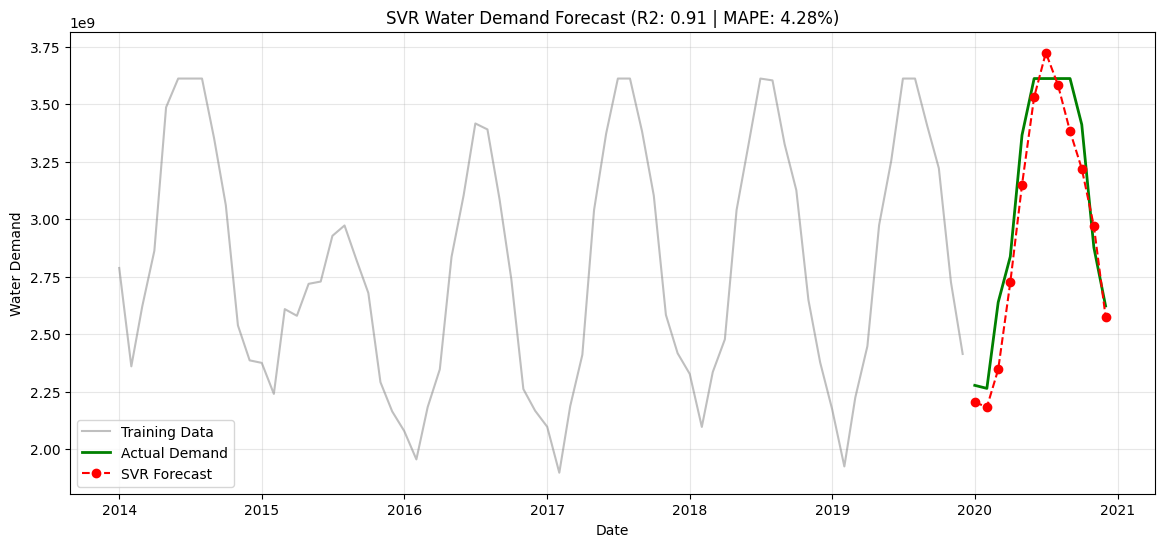

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.inspection import permutation_importance

# Choose Features
target_pwsid = df_monthly['PWSID'].unique()[0]
data = df_monthly[df_monthly['PWSID'] == target_pwsid].copy()
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data = data.sort_index()
target_col = 'Demand'
data['Month'] = data.index.month
data['Year'] = data.index.year


# Create lag and rolling features
data['Month_Sin'] = np.sin(2 * np.pi * data['Month']/12)
data['Month_Cos'] = np.cos(2 * np.pi * data['Month']/12)
lags = [1, 2, 3, 12]
for lag in lags:
    data[f'Lag_{lag}'] = data[target_col].shift(lag)
data['Rolling_Mean_3'] = data[target_col].shift(1).rolling(window=3).mean()
weather_cols = ['Temperature', 'Precipitation', 'PDSI']
feature_cols = ['Month_Sin', 'Month_Cos', 'Rolling_Mean_3'] + [f'Lag_{l}' for l in lags] + weather_cols
data = data.dropna()



# Split the data
train = data[data.index.year < 2020]
test = data[data.index.year == 2020]

X_train = train[feature_cols]
y_train = train[target_col].values.reshape(-1, 1)
X_test = test[feature_cols]
y_test = test[target_col].values.reshape(-1, 1)



# Standard(use basic)
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train).ravel()
X_test_scaled = scaler_X.transform(X_test)




# Model, choose hyperparameters
param_grid = {
    'kernel': ['rbf'],
    'C': [1, 10, 100, 1000],        
    'gamma': [0.01, 0.1, 0.5, 1],  
    'epsilon': [0.01, 0.1, 0.2]    
}

tscv = TimeSeriesSplit(n_splits=3)

grid_search = GridSearchCV(
    estimator=SVR(),
    param_grid=param_grid,
    cv=tscv,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_scaled, y_train_scaled)

best_svr = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")


# Get best_params and use it to predict
y_pred_scaled = best_svr.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
y_true = y_test.flatten()



# Metrics
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print("\n--- SVR Model Results ---")
print(f"MAPE: {mape:.2f}%")
print(f"RMSE: {rmse:,.2f}")
print(f"MAE: {mae:,.2f}")
print(f"R2 Score: {r2:.4f}")


# Plot
plt.figure(figsize=(14, 6))
plt.plot(train.index, train[target_col], label='Training Data', color='gray', alpha=0.5)
plt.plot(test.index, y_true, label='Actual Demand', color='green', linewidth=2)
plt.plot(test.index, y_pred, label='SVR Forecast', color='red', linestyle='--', marker='o')

plt.title(f'SVR Water Demand Forecast (R2: {r2:.2f} | MAPE: {mape:.2f}%)')
plt.xlabel('Date')
plt.ylabel('Water Demand')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


Data monthly: use lag(1), lag(12) or seasonal (1,2,3 is sping...)
            rolling(3).mean()

Feature to get time: Month_sin, Month_cos
Train use split year
Arima: AR, I, MA, (p, d,q)
p: so luong he so tu hoi quy
d: so luong khac biet khong theo mua 
q: loi du bao he thong tre trong predict